In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import os

In [2]:
skel_dir = '/neurospin/dico/data/deep_folding/current/datasets/utrecht_dHCP/crops/2mm/CINGULATE_40wks/mask/Rskeleton.npy'
skels = np.load(skel_dir)

In [3]:
Utrecht = skels[:71][:,:,:,:,0] > 0
dHCP = skels[71:][:,:,:,:,0] > 0

In [4]:
average_utrecht = np.sum(Utrecht)/71
average_dHCP = np.sum(dHCP)/41 
print(average_utrecht)
print(average_dHCP)
print(f'Average ratio dHCP / Utrecht : {average_dHCP / average_utrecht}')

552.0422535211268
481.3414634146341
Average ratio dHCP / Utrecht : 0.8719286618813374


In [5]:
dHCP_volumes = np.sum(dHCP, axis= (1,2,3))
Utrecht_volumes = np.sum(Utrecht, axis = (1,2,3))

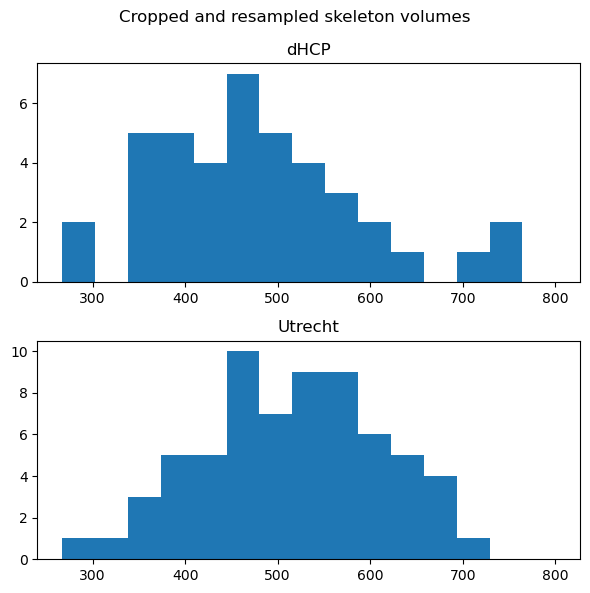

In [6]:
## the difference is mainly in the extreme values ?

fig, axs = plt.subplots(nrows=2, figsize=(6,6))

#maxi = max(np.max(dHCP_volumes), np.max(Utrecht_volumes))
maxi=800
mini = min(np.min(dHCP_volumes), np.min(Utrecht_volumes))
axs[0].hist(dHCP_volumes, range=[mini,maxi], bins=15)
axs[0].set_title('dHCP')
axs[1].hist(Utrecht_volumes, range=[mini,maxi], bins=15)
axs[1].set_title('Utrecht')
plt.suptitle('Cropped and resampled skeleton volumes')
plt.tight_layout()
plt.show()

In [7]:
labels = [0 for k in range(71)] + [1 for k in range(41)]
pred = Utrecht_volumes.tolist() + dHCP_volumes.tolist()
fpr, tpr, thresholds = metrics.roc_curve(labels, pred, pos_label=0)
metrics.auc(fpr, tpr)

0.6370663002404672

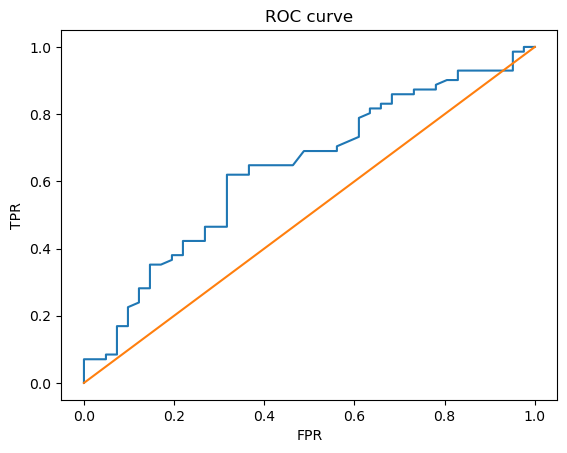

In [8]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [9]:
#idx 31 is the largest outlier
dir_names = '/neurospin/dico/data/deep_folding/current/datasets/utrecht_dHCP/crops/2mm/CINGULATE_40wks/mask/Rskeleton_subject.csv'
names = pd.read_csv(dir_names)['Subject'].tolist()
outlier = names[31]
print(f'Outlier: {outlier}')
control = names[0]
print(f'Control: {control}')

Outlier: prm2
Control: prm0001


In [11]:
for idx,elem in enumerate(Utrecht_volumes):
    if elem > 800:
     skel_dir = '/neurospin/dico/jlaval/data/dHCP_165/skels.npy'
skels = np.load(skel_dir)
print(f'{names[idx]}: {elem} vx')

prm97: 340 vx


In [12]:
# same with dHCP 165: WHOLE SKEL
dir_skels = '/neurospin/dico/jlaval/data/dHCP_165/skels.npy'
dir_names = '/neurospin/dico/jlaval/data/dHCP_165/names.npy'
labels_dir = '/neurospin/dico/jlaval/data/labels_dHCP.csv'
df_labels = pd.read_csv(labels_dir, sep=',')
thresholds = [9, 12, 15]
skels = np.load(dir_skels)
skels = skels[:,:,:,:,0] > 0
names = np.load(dir_names)
labels = [df_labels.loc[df_labels['Subject']==name]['Preterm'].tolist()[0] for name in names]
volumes = np.sum(skels, axis= (1,2,3))

In [13]:
volume_preterm = 0
volume_full_term = 0
for label, volume in zip(labels, volumes):
    if label:
        volume_preterm += volume
    else:
        volume_full_term += volume

volume_preterm = volume_preterm/37
volume_full_term = volume_full_term/128
print(volume_preterm)
print(volume_full_term)
print(f'ratio average volumes: {volume_preterm/volume_full_term}')

14434.702702702703
15694.78125
ratio average volumes: 0.9197135323375535


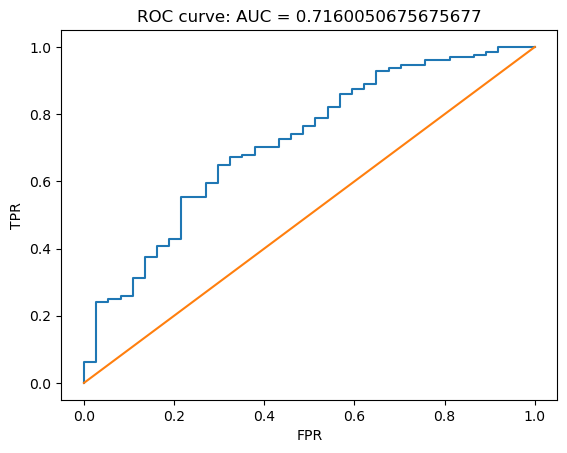

In [14]:
fpr, tpr, thresholds = metrics.roc_curve(labels, volumes, pos_label=0)
AUC = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'ROC curve: AUC = {AUC}')
plt.show()

In [16]:
# dHCP_165 STS
dir_skels = '/neurospin/dico/data/deep_folding/current/datasets/dHCP_165_subjects/crops/2mm/S.T.s./mask/Rskeleton.npy'
dir_names = '/neurospin/dico/data/deep_folding/current/datasets/dHCP_165_subjects/crops/2mm/S.T.s./mask/Rskeleton_subject.csv'
labels_dir = '/neurospin/dico/jlaval/data/labels_dHCP.csv'
df_labels = pd.read_csv(labels_dir, sep=',')
thresholds = [9, 12, 15]
skels = np.load(dir_skels)
skels = skels[:,:,:,:,0] > 0
names = pd.read_csv(dir_names)
names = names['Subject'].tolist()
labels = [df_labels.loc[df_labels['Subject']==name]['Preterm'].tolist()[0] for name in names]
volumes = np.sum(skels, axis= (1,2,3))

In [17]:
volume_preterm = 0
volume_full_term = 0
for label, volume in zip(labels, volumes):
    if label:
        volume_preterm += volume
    else:
        volume_full_term += volume

volume_preterm = volume_preterm/37
volume_full_term = volume_full_term/128
print(volume_preterm)
print(volume_full_term)
print(f'ratio average volumes: {volume_preterm/volume_full_term}')

1679.1351351351352
1848.296875
ratio average volumes: 0.9084769648464266


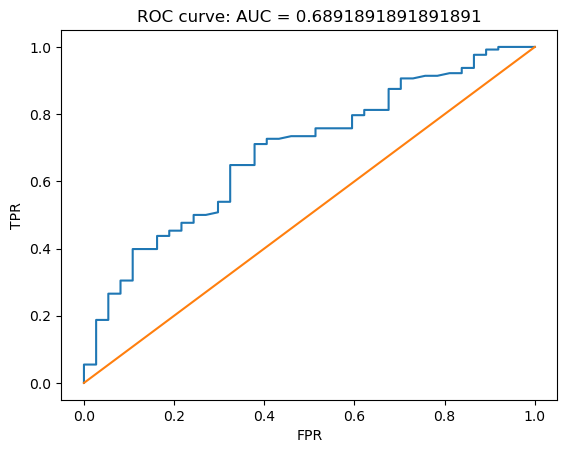

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(labels, volumes, pos_label=0)
AUC = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'ROC curve: AUC = {AUC}')
plt.show()

In [32]:
# use center of mass to compute AUC: are preterm shifted at 40 weeks ?
from scipy.ndimage.measurements import center_of_mass
x_list, y_list, z_list = [], [], []
for skel in skels:
    x,y,z = center_of_mass(skel)
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)

<ipython-input-32-36c6eaf7666a>:2: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import center_of_mass


In [36]:
for pred in (x_list, y_list, z_list):
    fpr, tpr, thresholds = metrics.roc_curve(labels, pred, pos_label=0)
    AUC = metrics.auc(fpr, tpr)
    print(np.abs(0.5-AUC)+0.5) #AUC but greater than 0.5

0.5107685810810811
0.6763091216216216
0.5460304054054055


In [ ]:
# build a classifier based on volume, number of neighbors and center of mass ?
# go further with center of mass of each sulcus ? ...

## COUNT NODES

In [11]:
# count nodes on F.C.M ant for each patient = proxy for noise ?
nodes_utrecht = []
#Utrecht
for subject in names[:71]:
    dir_arg = '/neurospin/dico/data/bv_databases/human/manually_labeled/utrecht/utrecht_sulci/'+ subject + '/t1mri/40wks_acquisition/default_analysis/folds/3.1/default_session_2_manual/R'+subject+'_default_session_2_manual.arg'
    with open(dir_arg, 'r') as file:
        data = file.read().replace('\n', '')
        nb_nodes = (data.count('F.C.M.ant._right'))
        nodes_utrecht.append(nb_nodes)

#dHCP
nodes_dHCP = []
for subject in names[71:]:
    dir_arg = '/neurospin/dico/data/bv_databases/dHCP/neurospin/grip/external_databases/dHCP_CR_JD_2018/release1/subjects/dHCP_release1/'+subject+'/t1mri/default_acquisition/default_analysis/folds/3.1/default_session_manual/R'+subject+'_default_session_manual.arg'
    if os.path.isfile(dir_arg):
        with open(dir_arg, 'r') as file:
            data = file.read().replace('\n', '')
            nb_nodes = (data.count('F.C.M.ant._right'))
            nodes_dHCP.append(nb_nodes)
    else:
        print(subject)

kt090312


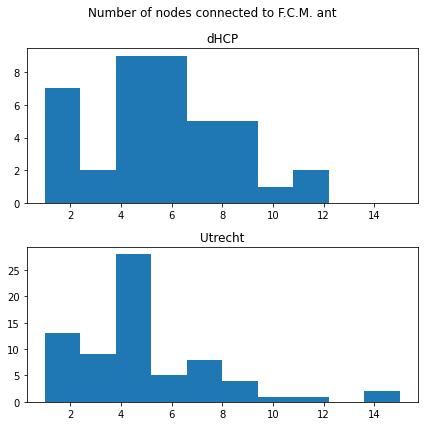

In [12]:
# Remove subject kt090312 from names
names_utrecht = names[:71]
names_dHCP = names[72:] #first subject of the dataset

# plot hist
fig, axs = plt.subplots(nrows=2, figsize=(6,6))

maxi = max(np.max(nodes_dHCP), np.max(nodes_utrecht))
mini = min(np.min(nodes_dHCP), np.min(nodes_utrecht))
axs[0].hist(nodes_dHCP, range=[mini,maxi])
axs[0].set_title('dHCP')
axs[1].hist(nodes_utrecht, range=[mini,maxi])
axs[1].set_title('Utrecht')
plt.suptitle('Number of nodes connected to F.C.M. ant')
plt.tight_layout()
plt.show()

In [13]:
print(f'Utrecht: {np.mean(nodes_utrecht)}')
print(f'dHCP: {np.mean(nodes_dHCP)}')

Utrecht: 4.802816901408451
dHCP: 5.525


In [14]:
# AUC
pred  = nodes_utrecht + nodes_dHCP
labels = [1 for k in range(71)] + [0 for k in range(40)]
fpr, tpr, thresholds = metrics.roc_curve(labels, pred, pos_label=0)
metrics.auc(fpr, tpr)

0.5963028169014084

AUC is not as high as with number of voxels, but still significant difference. This time dHCP has a higher number than Utrecht, whereas Utrecht had overall a higher number of voxels. Is it then just a problem of scaling ? (apart from outliers)

In [15]:
# Let's look in anatomist at the dHCP subjects who show a noisy profile, ie many nodes
for name, nodes in zip(names_dHCP, nodes_dHCP):
    if nodes > 10:
        print(nodes, name)

12 sub-CC00162XX06_ses-53600_T2w
12 sub-CC00201XX03_ses-67600_T2w


## Compare whole brain volume

In [12]:
# get whole brain volume for each subject (before resampling)
volume_utrecht = []
#Utrecht
for subject in names[:71]:
    dir_arg = '/neurospin/dico/data/bv_databases/human/manually_labeled/utrecht/utrecht_sulci/'+ subject + '/t1mri/40wks_acquisition/default_analysis/folds/3.1/default_session_2_manual/R'+subject+'_default_session_2_manual.arg'
    with open(dir_arg, 'r') as file:
        data = file.read()
        volume = int(data.split('\n')[20].split(' ')[-1])
        volume_utrecht.append(volume)

#dHCP
volume_dHCP = []
for subject in names[71:]:
    dir_arg = '/neurospin/dico/data/bv_databases/dHCP/neurospin/grip/external_databases/dHCP_CR_JD_2018/release1/subjects/dHCP_release1/'+subject+'/t1mri/default_acquisition/default_analysis/folds/3.1/default_session_manual/R'+subject+'_default_session_manual.arg'
    if os.path.isfile(dir_arg):
        with open(dir_arg, 'r') as file:
            data = file.read()
            volume = int(data.split('\n')[20].split(' ')[-1])
            volume_dHCP.append(volume)
    else:
        print(subject)

kt090312


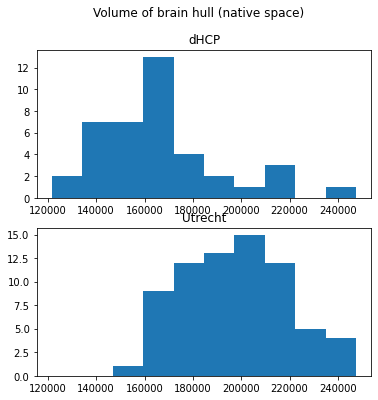

In [13]:
# Remove subject kt090312 from names
names_utrecht = names[:71]
names_dHCP = names[72:] #first subject of the dataset

# plot hist
fig, axs = plt.subplots(nrows=2, figsize=(6,6))

maxi = max(np.max(volume_dHCP), np.max(volume_utrecht))
mini = min(np.min(volume_dHCP), np.min(volume_utrecht))
axs[0].hist(volume_dHCP, range=[mini,maxi])
axs[0].set_title('dHCP')
axs[1].hist(volume_utrecht, range=[mini,maxi])
axs[1].set_title('Utrecht')
plt.suptitle('Volume of brain hull (native space)')
plt.tight_layout
plt.show()

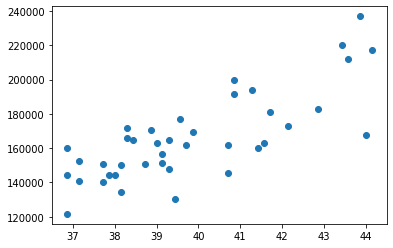

In [20]:
# load age file
"""
dir_labels = '/home/jl274628/Documents/Rskeleton_subject.csv'
labels = pd.read_csv(dir_labels, sep=',')
dir_dHCP = '/home/jl274628/Documents/info_dHCP.tsv'
age_dHCP = pd.read_csv(dir_dHCP, usecols=['participant_id','scan_age'], sep='\t')

list_labels = labels['Subject'].tolist()
list_labels.remove('kt090312')
age_dHCP = []

for idx, elem in enumerate(list_labels[71:]):

    age = float(age_dHCP.loc[age_dHCP['participant_id'] == elem[4:15]]['scan_age'].tolist()[0])
    age_dHCP.append(age)
"""

# NB: these two age lists are equivalent
ages = pd.read_csv('/home/jl274628/Documents/scan_age.csv')
age_list = ages['scan_age'].tolist()
age_dHCP = age_list[71:]

plt.scatter(age_dHCP, volume_dHCP)

In [18]:
volume = float(data.split('\n')[20].split(' ')[-1])
print(f'volume: {volume}')
volume = float(data.split('\n')[6].split(' ')[-1])
print(f'CSF volume: {volume}')
volume = float(data.split('\n')[8].split(' ')[-1])
print(f'GM volume: {volume}')
volume = float(data.split('\n')[9].split(' ')[-1])
print(f'LCR volume: {volume}')

CSF_volume = 0
split_data = data.split('CSF_volume')
for elem in split_data[1:]:
    vol = float(elem.split('\n')[0].split(' ')[-1])
    CSF_volume += vol
print(f'Total CSF_volume: {CSF_volume}')

GM_volume = 0
split_data = data.split('GM_volume')
for elem in split_data[1:]:
    vol = float(elem.split('\n')[0].split(' ')[-1])
    GM_volume += vol
print(f'Total GM_volume: {GM_volume}')

LCR_volume = 0
split_data = data.split('LCR_volume')
for elem in split_data[1:]:
    vol = float(elem.split('\n')[0].split(' ')[-1])
    LCR_volume += vol
print(f'Total LCR_volume: {LCR_volume}')

volume: 167557.0
CSF volume: 22401.8
GM volume: 56526.0
LCR volume: 22401.8
Total CSF_volume: 44803.555
Total GM_volume: 113051.995
Total LCR_volume: 44803.555


In [19]:
# same as before but using grey matter volume instead of hull
# get whole brain volume for each subject (before resampling)
volume_utrecht = []
#Utrecht
for subject in names[:71]:
    dir_arg = '/neurospin/dico/data/bv_databases/human/manually_labeled/utrecht/utrecht_sulci/'+ subject + '/t1mri/40wks_acquisition/default_analysis/folds/3.1/default_session_2_manual/R'+subject+'_default_session_2_manual.arg'
    with open(dir_arg, 'r') as file:
        data = file.read()
        volume = float(data.split('\n')[8].split(' ')[-1])
        volume_utrecht.append(volume)

#dHCP
volume_dHCP = []
for subject in names[71:]:
    dir_arg = '/neurospin/dico/data/bv_databases/dHCP/neurospin/grip/external_databases/dHCP_CR_JD_2018/release1/subjects/dHCP_release1/'+subject+'/t1mri/default_acquisition/default_analysis/folds/3.1/default_session_manual/R'+subject+'_default_session_manual.arg'
    if os.path.isfile(dir_arg):
        with open(dir_arg, 'r') as file:
            data = file.read()
            volume = float(data.split('\n')[8].split(' ')[-1])
            volume_dHCP.append(volume)
    else:
        print(subject)

kt090312


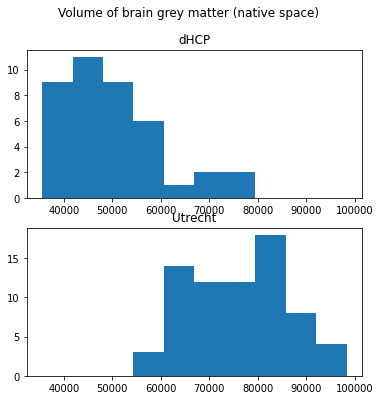

In [20]:
# Remove subject kt090312 from names
names_utrecht = names[:71]
names_dHCP = names[72:] #first subject of the dataset

# plot hist
fig, axs = plt.subplots(nrows=2, figsize=(6,6))

maxi = max(np.max(volume_dHCP), np.max(volume_utrecht))
mini = min(np.min(volume_dHCP), np.min(volume_utrecht))
axs[0].hist(volume_dHCP, range=[mini,maxi])
axs[0].set_title('dHCP')
axs[1].hist(volume_utrecht, range=[mini,maxi])
axs[1].set_title('Utrecht')
plt.suptitle('Volume of brain grey matter (native space)')
plt.tight_layout
plt.show()

In [21]:
# Compare volumes summing on FCM ant only (before resampling)
volume_utrecht = []
#Utrecht
for subject in names[:71]:
    dir_arg = '/neurospin/dico/data/bv_databases/human/manually_labeled/utrecht/utrecht_sulci/'+ subject + '/t1mri/40wks_acquisition/default_analysis/folds/3.1/default_session_2_manual/R'+subject+'_default_session_2_manual.arg'
    with open(dir_arg, 'r') as file:
        data = file.read()
        volume = 0
        split_data = data.split('name                   F.C.M.ant._right')
        for elem in split_data:
            vol = float(elem.split('GM_volume', 1)[1].split('\n', 1)[0].split(' ')[-1])
            volume+=vol

        volume_utrecht.append(volume)

#dHCP
volume_dHCP = []
for subject in names[71:]:
    dir_arg = '/neurospin/dico/data/bv_databases/dHCP/neurospin/grip/external_databases/dHCP_CR_JD_2018/release1/subjects/dHCP_release1/'+subject+'/t1mri/default_acquisition/default_analysis/folds/3.1/default_session_manual/R'+subject+'_default_session_manual.arg'
    if os.path.isfile(dir_arg):
        with open(dir_arg, 'r') as file:
            data = file.read()
            volume = 0
            split_data = data.split('name                   F.C.M.ant._right')
            for elem in split_data:
                vol = float(elem.split('GM_volume', 1)[1].split('\n', 1)[0].split(' ')[-1])
                volume+=vol

            volume_dHCP.append(volume)
    else:
        print(subject)

kt090312


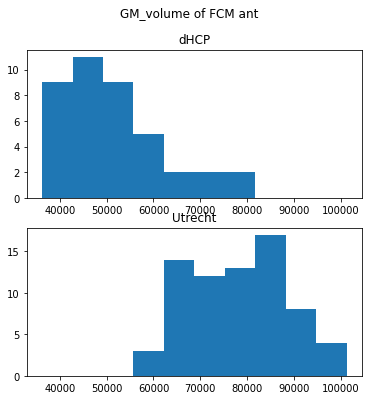

In [22]:
# plot hist
fig, axs = plt.subplots(nrows=2, figsize=(6,6))

maxi = max(np.max(volume_dHCP), np.max(volume_utrecht))
mini = min(np.min(volume_dHCP), np.min(volume_utrecht))
axs[0].hist(volume_dHCP, range=[mini,maxi])
axs[0].set_title('dHCP')
axs[1].hist(volume_utrecht, range=[mini,maxi])
axs[1].set_title('Utrecht')
plt.suptitle('GM_volume of FCM ant')
plt.tight_layout
plt.show()

# count voxels in raw skeletons (before resampling)

In [23]:
# list of volumes were saved already, but beware, order is random...

volume_dHCP=np.load('/neurospin/dico/jlaval/data/volumes_dHCP.npy')
volume_utrecht=np.load('/neurospin/dico/jlaval/data/volumes_Utrecht_40wks.npy')

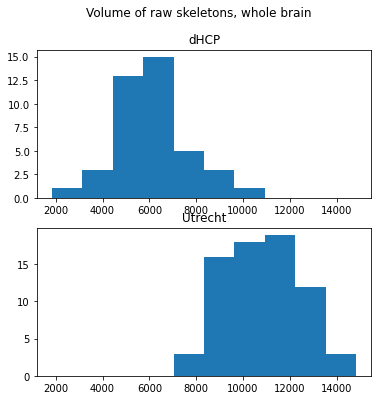

In [24]:
fig, axs = plt.subplots(nrows=2, figsize=(6,6))

vx_vol_dHCP=0.5*0.5*0.5
vx_vol_Utrecht=0.7*0.8*0.7

# voxels volume in native space are different depending on the dataset
volume_dHCP = volume_dHCP*vx_vol_dHCP
volume_utrecht = volume_utrecht*vx_vol_Utrecht

maxi = max(np.max(volume_dHCP), np.max(volume_utrecht))
mini = min(np.min(volume_dHCP), np.min(volume_utrecht))
axs[0].hist(volume_dHCP, range=[mini,maxi])
axs[0].set_title('dHCP')
axs[1].hist(volume_utrecht, range=[mini,maxi])
axs[1].set_title('Utrecht')
plt.suptitle('Volume of raw skeletons, whole brain')
plt.tight_layout
plt.show()

## Volume of brains directly computed from the .nii files

In [25]:
# list of volumes were saved already, but beware, order is random...

volume_dHCP=np.load('/neurospin/dico/jlaval/data/full_volumes_dHCP.npy')
volume_utrecht=np.load('/neurospin/dico/jlaval/data/full_volumes_Utrecht.npy')

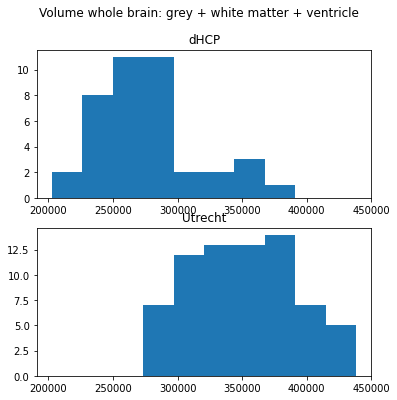

In [26]:
fig, axs = plt.subplots(nrows=2, figsize=(6,6))

maxi = max(np.max(volume_dHCP), np.max(volume_utrecht))
mini = min(np.min(volume_dHCP), np.min(volume_utrecht))
axs[0].hist(volume_dHCP, range=[mini,maxi])
axs[0].set_title('dHCP')
axs[1].hist(volume_utrecht, range=[mini,maxi])
axs[1].set_title('Utrecht')
plt.suptitle('Volume whole brain: grey + white matter + ventricle')
plt.tight_layout
plt.show()

In [ ]:
# On ne comprend toujours pas pk les volumes des cerveaux d'Utrecht sont plus grands. Plot en fonction de l'âge des sujets! : explique la différence de volumes ?
# Pour les volumes, voir si la nouvelle distribution de volume (rescaled avec px vol) des squelettes sur tout le cerveau est cohérente avec celle des crops resampled
# visualiser avec Anatomist les buckets dans skeletons/raw/Rbuckets (au lieu de R), comparer resampled ou non, et les database (4 possibilités). Voir s'il y a quelque chose d'anormal ?

In [31]:
# load age file
ages = pd.read_csv('/home/jl274628/Documents/scan_age.csv')
age_list = ages['scan_age'].tolist()
age_utrecht = age_list[:71]
age_dHCP = age_list[71:]

df_volume_dHCP=pd.read_csv('/neurospin/dico/jlaval/data/full_volumes_dHCP.csv')
df_volume_utrecht=pd.read_csv('/neurospin/dico/jlaval/data/full_volumes_Utrecht.csv')

In [32]:
subjects = ages['Subject'].tolist()
subjects_utrecht = subjects[:71]
subjects_dHCP = subjects[71:]
volume_dHCP = []
for subject in subjects_dHCP:
    volume = df_volume_dHCP.loc[df_volume_dHCP['Subject']==subject]['Volume'].tolist()[0]
    volume_dHCP.append(volume)
volume_utrecht = []
for subject in subjects_utrecht:
    volume = df_volume_utrecht.loc[df_volume_utrecht['Subject']==subject]['Volume'].tolist()[0]
    volume_utrecht.append(volume)


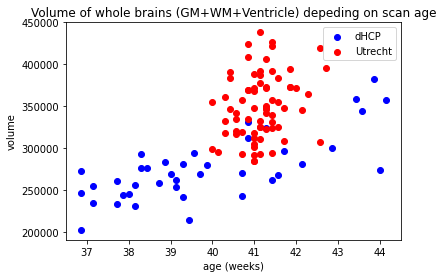

In [33]:
plt.scatter(age_dHCP, volume_dHCP, color='b', label='dHCP')
plt.scatter(age_utrecht, volume_utrecht, color='r', label='Utrecht')
plt.xlabel('age (weeks)')
plt.ylabel('volume')
plt.title('Volume of whole brains (GM+WM+Ventricle) depeding on scan age')
plt.legend()
plt.show()

In [40]:
## ALL WRONG
# Same but using skeleton volumes
volume_dHCP=np.load('/neurospin/dico/jlaval/data/volumes_dHCP.csv')
volume_utrecht=np.load('/neurospin/dico/jlaval/data/full_volumes_Utrecht.csv')
vx_vol_dHCP=0.5*0.5*0.5
vx_vol_Utrecht=0.7*0.8*0.7
# voxels volume in native space are different depending on the dataset
volume_dHCP = volume_dHCP*vx_vol_dHCP
volume_utrecht = volume_utrecht*vx_vol_Utrecht

volume_dHCP = volume_dHCP[1:]

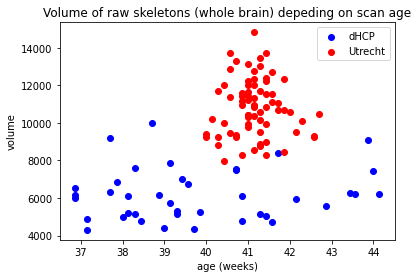

In [41]:
## BEWARE: files were not in the same order in computation of volume_dHCP and age_dHCP !!!!
## The figure is wrong

plt.scatter(age_dHCP, volume_dHCP, color='b', label='dHCP')
plt.scatter(age_utrecht, volume_utrecht, color='r', label='Utrecht')
plt.xlabel('age (weeks)')
plt.ylabel('volume')
plt.title('Volume of raw skeletons (whole brain) depeding on scan age')
plt.legend()
plt.show()